In [282]:
import pandas as pd
import numpy as np

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
df = pd.read_csv('Datasets/sampled_dataset.csv')

In [285]:
df.head(12)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-7182628,Source1,1,2020-04-17 09:29:30,2020-04-17 10:29:30,26.706900,-80.119360,26.706900,-80.119360,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-5404588,Source1,2,2022-04-21 10:01:00.000000000,2022-04-21 11:44:08.000000000,38.781024,-121.265820,38.780377,-121.265815,0.045,...,False,False,True,False,False,False,Day,Day,Day,Day
2,A-156000,Source3,3,2016-08-12 16:45:00,2016-08-12 17:15:00,33.985249,-84.269348,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-1871277,Source2,3,2019-09-20 15:22:16,2019-09-20 15:56:00,47.118706,-122.556908,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-2031222,Source2,2,2019-06-03 16:55:43,2019-06-03 18:12:09,33.451355,-111.890343,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
5,A-1167415,Source2,2,2021-02-04 12:48:21,2021-02-04 16:51:15,42.448910,-93.721138,NaN,NaN,7.770,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-4021880,Source1,2,2022-06-23 10:57:30,2022-06-23 15:43:00,38.858169,-77.219815,38.884636,-77.220805,1.829,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-1314019,Source2,3,2020-09-25 16:48:29,2020-09-25 17:38:44,32.434292,-82.500710,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-721069,Source2,2,2022-02-04 19:57:43,2022-02-04 20:42:10,39.106960,-76.939789,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Night,Night
9,A-3677476,Source1,2,2023-03-26 14:38:00.000000000,2023-03-26 17:29:42.000000000,37.636405,-122.087711,37.644790,-122.093729,0.666,...,False,False,False,False,False,False,Day,Day,Day,Day


In [286]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                56012 non-null   float64
 8   End_Lng                56012 non-null   float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            99999 non-null   object 
 11  Street                 99830 non-null   object 
 12  City                   99997 non-null   object 
 13  County                 100000 non-null  object 
 14  State                  100000 non-nul

In [287]:
print(df.shape)

(100000, 46)


In [288]:
print(df.isnull().sum())

ID                           0
Source                       0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                  43988
End_Lng                  43988
Distance(mi)                 0
Description                  1
Street                     170
City                         3
County                       0
State                        0
Zipcode                     21
Country                      0
Timezone                   100
Airport_Code               302
Weather_Timestamp         1576
Temperature(F)            2120
Wind_Chill(F)            25933
Humidity(%)               2259
Pressure(in)              1817
Visibility(mi)            2262
Wind_Direction            2311
Wind_Speed(mph)           7443
Precipitation(in)        28622
Weather_Condition         2216
Amenity                      0
Bump                         0
Crossing                     0
Give_Way

In [289]:
print("Total missing values:", df.isnull().sum().sum())

Total missing values: 166436


In [290]:
for val in ["?", "-", " ", "NA", ""]:
    print(val, (df == val).sum().sum())

? 0
- 0
  0
NA 0
 0


In [291]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


ID                        0.000
Source                    0.000
Severity                  0.000
Start_Time                0.000
End_Time                  0.000
Start_Lat                 0.000
Start_Lng                 0.000
End_Lat                  43.988
End_Lng                  43.988
Distance(mi)              0.000
Description               0.001
Street                    0.170
City                      0.003
County                    0.000
State                     0.000
Zipcode                   0.021
Country                   0.000
Timezone                  0.100
Airport_Code              0.302
Weather_Timestamp         1.576
Temperature(F)            2.120
Wind_Chill(F)            25.933
Humidity(%)               2.259
Pressure(in)              1.817
Visibility(mi)            2.262
Wind_Direction            2.311
Wind_Speed(mph)           7.443
Precipitation(in)        28.622
Weather_Condition         2.216
Amenity                   0.000
Bump                      0.000
Crossing

In [292]:
import pandas as pd

In [293]:
df = pd.read_csv('Datasets/sampled_dataset.csv')

In [294]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [295]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

In [296]:
df[['Start_Time', 'End_Time']].dtypes

Start_Time    datetime64[ns]
End_Time      datetime64[ns]
dtype: object

In [297]:
date_details = pd.DataFrame({
    'ID': df['ID'],
    'Start_Day': df['Start_Time'].dt.day_name(),
    'Start_Month': df['Start_Time'].dt.month_name(),
    'Start_Year': df['Start_Time'].dt.year.astype('Int64'),
    'Start_Hour': df['Start_Time'].dt.hour.astype('Int64'),
    'End_Day': df['End_Time'].dt.day_name(),
    'End_Month': df['End_Time'].dt.month_name(),
    'End_Year': df['End_Time'].dt.year.astype('Int64'),
    'End_Hour': df['End_Time'].dt.hour.astype('Int64'),
})

In [298]:
date_details.to_csv("Datasets/dates_exploded.csv", index=False)

In [299]:
df_merged = pd.merge(df, date_details, on='ID', how='inner')

In [300]:
start_idx = df.columns.get_loc("Start_Time") + 1
end_idx = df.columns.get_loc("End_Time") + 1

In [301]:
new_column_order = (
    list(df.columns[:start_idx]) +
    ['Start_Day', 'Start_Month', 'Start_Year', 'Start_Hour'] +
    list(df.columns[start_idx:end_idx]) +
    ['End_Day', 'End_Month', 'End_Year', 'End_Hour'] +
    list(df.columns[end_idx:])
)

In [302]:
df_merged = df_merged[new_column_order]

In [303]:
# Integrimi i dataseteve ne nje te vetem duke zberthyer daten ne dite, muaj, vit dhe ore
df_merged.to_csv("Datasets/Week2_Dataset.csv", index=False)

In [304]:
df_merged.dtypes

ID                               object
Source                           object
Severity                          int64
Start_Time               datetime64[ns]
Start_Day                        object
Start_Month                      object
Start_Year                        Int64
Start_Hour                        Int64
End_Time                 datetime64[ns]
End_Day                          object
End_Month                        object
End_Year                          Int64
End_Hour                          Int64
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Street                           object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object


In [305]:
print(df_merged.head())

          ID   Source  Severity          Start_Time Start_Day Start_Month  \
0  A-7182628  Source1         1 2020-04-17 09:29:30    Friday       April   
1  A-5404588  Source1         2                 NaT       NaN         NaN   
2   A-156000  Source3         3 2016-08-12 16:45:00    Friday      August   
3  A-1871277  Source2         3 2019-09-20 15:22:16    Friday   September   
4  A-2031222  Source2         2 2019-06-03 16:55:43    Monday        June   

   Start_Year  Start_Hour            End_Time End_Day  ... Roundabout  \
0        2020           9 2020-04-17 10:29:30  Friday  ...      False   
1        <NA>        <NA>                 NaT     NaN  ...      False   
2        2016          16 2016-08-12 17:15:00  Friday  ...      False   
3        2019          15 2019-09-20 15:56:00  Friday  ...      False   
4        2019          16 2019-06-03 18:12:09  Monday  ...      False   

   Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  \
0    False  False            F

In [306]:
# Agregimi 1 - Numri i aksidenteve dhe vrazhdesia e tyre sipas ores (nga 0 deri 23)
df_merged_hourly = (
    df_merged.groupby('Start_Hour', as_index=False)
    .agg(
        Accident_Count=('ID', 'count'),
        Avg_Severity=('Severity', 'mean')
    )
    .sort_values(by='Start_Hour', ascending=True)
)

In [307]:
print(df_merged_hourly.to_string(index=False))

 Start_Hour  Accident_Count  Avg_Severity
          0            1293      2.249033
          1            1173      2.198636
          2            1087      2.241950
          3             962      2.269231
          4            1995      2.262155
          5            2725      2.238532
          6            4838      2.223646
          7            7115      2.203092
          8            6844      2.199006
          9            4197      2.243746
         10            4151      2.221152
         11            4127      2.226557
         12            4012      2.242522
         13            4582      2.229376
         14            5001      2.223755
         15            5994      2.229897
         16            6772      2.229622
         17            6833      2.227865
         18            5087      2.258895
         19            3421      2.243204
         20            2513      2.256665
         21            2205      2.258957
         22            1953      2

In [308]:
# Agregimi 2 - Vrazhdesia dhe numri i aksidenteve varesisht motit
df_merged_weather_severity = (
    df_merged.groupby('Weather_Condition', as_index=False)
    .agg(
        Avg_Severity=('Severity', 'mean'),
        Accident_Count=('ID', 'count')
    )
    .sort_values(by='Accident_Count', ascending=False)
)

In [309]:
print(df_merged_weather_severity.to_string(index=False))

           Weather_Condition  Avg_Severity  Accident_Count
                        Fair      2.128204           32971
               Mostly Cloudy      2.225856           13088
                       Clear      2.360554           10617
                      Cloudy      2.161588           10502
               Partly Cloudy      2.230300            9188
                    Overcast      2.393749            4927
                  Light Rain      2.240873            4492
            Scattered Clouds      2.372768            2688
                  Light Snow      2.261677            1670
                         Fog      2.156250            1312
                        Rain      2.241321            1181
                        Haze      2.201220             984
                Fair / Windy      2.155556             450
                  Heavy Rain      2.281690             426
               Light Drizzle      2.246057             317
              Cloudy / Windy      2.158120             2

In [310]:
df_merged.shape

(100000, 54)

In [311]:
df_merged.isnull().sum().sort_values(ascending=False)
#shikimi i vlerave te zbrazeta ne cdo kolone


End_Lat                  43988
End_Lng                  43988
Precipitation(in)        28622
Wind_Chill(F)            25933
Start_Month               9649
Start_Year                9649
End_Hour                  9649
End_Year                  9649
End_Time                  9649
Start_Hour                9649
End_Month                 9649
End_Day                   9649
Start_Day                 9649
Start_Time                9649
Wind_Speed(mph)           7443
Wind_Direction            2311
Visibility(mi)            2262
Humidity(%)               2259
Weather_Condition         2216
Temperature(F)            2120
Pressure(in)              1817
Weather_Timestamp         1576
Astronomical_Twilight      326
Nautical_Twilight          326
Civil_Twilight             326
Sunrise_Sunset             326
Airport_Code               302
Street                     170
Timezone                   100
Zipcode                     21
City                         3
Description                  1
Start_Ln

In [312]:
threshold = 0.5 * len(df_merged)
df_clean = df_merged.dropna(axis=1, thresh=threshold)
print("Kolonat pas heqjes se atyre qe iu mungojne me shume sesa 50% e vlerave")
print(df_clean.columns)
# Heqja e koloneve me me shume se 50% vlera te zbrazeta

Kolonat pas heqjes se atyre qe iu mungojne me shume sesa 50% e vlerave
Index(['ID', 'Source', 'Severity', 'Start_Time', 'Start_Day', 'Start_Month',
       'Start_Year', 'Start_Hour', 'End_Time', 'End_Day', 'End_Month',
       'End_Year', 'End_Hour', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [313]:
df_merged.shape

(100000, 54)

In [314]:
duplicates = df_merged.duplicated().sum()
print("Nr i rreshtave te duplikuar:", duplicates)

df_merged = df_merged.drop_duplicates()


Nr i rreshtave te duplikuar: 0


In [315]:
print(df_merged.head())

          ID   Source  Severity          Start_Time Start_Day Start_Month  \
0  A-7182628  Source1         1 2020-04-17 09:29:30    Friday       April   
1  A-5404588  Source1         2                 NaT       NaN         NaN   
2   A-156000  Source3         3 2016-08-12 16:45:00    Friday      August   
3  A-1871277  Source2         3 2019-09-20 15:22:16    Friday   September   
4  A-2031222  Source2         2 2019-06-03 16:55:43    Monday        June   

   Start_Year  Start_Hour            End_Time End_Day  ... Roundabout  \
0        2020           9 2020-04-17 10:29:30  Friday  ...      False   
1        <NA>        <NA>                 NaT     NaN  ...      False   
2        2016          16 2016-08-12 17:15:00  Friday  ...      False   
3        2019          15 2019-09-20 15:56:00  Friday  ...      False   
4        2019          16 2019-06-03 18:12:09  Monday  ...      False   

   Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  \
0    False  False            F

In [316]:
# Hapesirat dhe uniformizimi i tekstit ne kolona te ndryshme
df_merged['Start_Day'] = df_merged['Start_Day'].str.strip().str.title()
df_merged['Start_Month'] = df_merged['Start_Month'].str.strip().str.title()

df_merged['End_Day'] = df_merged['End_Day'].str.strip().str.title()
df_merged['End_Month'] = df_merged['End_Month'].str.strip().str.title()

df_merged['Weather_Timestamp'] = pd.to_datetime(df_merged['Weather_Timestamp'], errors='coerce')

df_merged['Wind_Direction'] = df_merged['Wind_Direction'].str.strip().str.title()

df_merged['Weather_Condition'] = df_merged['Weather_Condition'].str.strip().str.title()
df_merged['Sunrise_Sunset'] = df_merged['Sunrise_Sunset'].str.strip().str.title()
df_merged['Civil_Twilight'] = df_merged['Civil_Twilight'].str.strip().str.title()
df_merged['Nautical_Twilight'] = df_merged['Nautical_Twilight'].str.strip().str.title()
df_merged['Astronomical_Twilight'] = df_merged['Astronomical_Twilight'].str.strip().str.title() 
df_merged['Street'] = df_merged['Street'].str.strip().str.title()

df_merged['City'] = df_merged['City'].str.strip().str.title()
df_merged['County'] = df_merged['County'].str.strip().str.title()   
df_merged['State'] = df_merged['State'].str.strip().str.upper()
df_merged['Zipcode'] = df_merged['Zipcode'].str.strip()
df_merged['Country'] = df_merged['Country'].str.strip().str.upper()
df_merged['Timezone'] = df_merged['Timezone'].str.strip().str.upper()
df_merged['Airport_Code'] = df_merged['Airport_Code'].str.strip().str.upper()



In [317]:
print(df_merged.head())

          ID   Source  Severity          Start_Time Start_Day Start_Month  \
0  A-7182628  Source1         1 2020-04-17 09:29:30    Friday       April   
1  A-5404588  Source1         2                 NaT       NaN         NaN   
2   A-156000  Source3         3 2016-08-12 16:45:00    Friday      August   
3  A-1871277  Source2         3 2019-09-20 15:22:16    Friday   September   
4  A-2031222  Source2         2 2019-06-03 16:55:43    Monday        June   

   Start_Year  Start_Hour            End_Time End_Day  ... Roundabout  \
0        2020           9 2020-04-17 10:29:30  Friday  ...      False   
1        <NA>        <NA>                 NaT     NaN  ...      False   
2        2016          16 2016-08-12 17:15:00  Friday  ...      False   
3        2019          15 2019-09-20 15:56:00  Friday  ...      False   
4        2019          16 2019-06-03 18:12:09  Monday  ...      False   

   Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop  \
0    False  False            F

In [318]:
df_merged.replace(['Unknown', 'None', 'N/A', 'UNK'], np.nan, inplace=True)

In [319]:
df_merged.isna().sum().sort_values(ascending=False)


End_Lat                  43988
End_Lng                  43988
Precipitation(in)        28622
Wind_Chill(F)            25933
Start_Month               9649
Start_Year                9649
End_Hour                  9649
End_Year                  9649
End_Time                  9649
Start_Hour                9649
End_Month                 9649
End_Day                   9649
Start_Day                 9649
Start_Time                9649
Wind_Speed(mph)           7443
Wind_Direction            2311
Visibility(mi)            2262
Humidity(%)               2259
Weather_Condition         2216
Temperature(F)            2120
Pressure(in)              1817
Weather_Timestamp         1576
Astronomical_Twilight      326
Nautical_Twilight          326
Civil_Twilight             326
Sunrise_Sunset             326
Airport_Code               302
Street                     170
Timezone                   100
Zipcode                     21
City                         3
Description                  2
Start_Ln

In [320]:
df_merged.to_csv("Datasets/Week3_Dataset.csv", index=False)

In [321]:
missing = df_merged.isnull().sum().to_frame('MissingValues')
missing['MissingPercent'] = (missing['MissingValues'] / len(df)) * 100
missing = missing[missing['MissingValues'] > 0].sort_values('MissingPercent', ascending=False)
print("Kolonat me vlera mungese:")
print(missing.head(20))

Kolonat me vlera mungese:
                   MissingValues  MissingPercent
End_Lat                    43988          43.988
End_Lng                    43988          43.988
Precipitation(in)          28622          28.622
Wind_Chill(F)              25933          25.933
Start_Hour                  9649           9.649
End_Time                    9649           9.649
Start_Time                  9649           9.649
Start_Day                   9649           9.649
End_Month                   9649           9.649
End_Day                     9649           9.649
End_Hour                    9649           9.649
End_Year                    9649           9.649
Start_Month                 9649           9.649
Start_Year                  9649           9.649
Wind_Speed(mph)             7443           7.443
Wind_Direction              2311           2.311
Visibility(mi)              2262           2.262
Humidity(%)                 2259           2.259
Weather_Condition           2216           

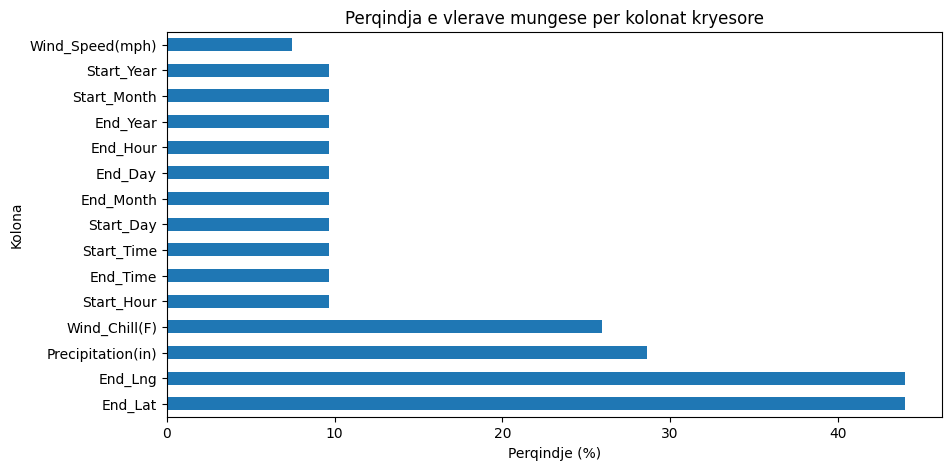

In [322]:
plt.figure(figsize=(10,5))
missing['MissingPercent'].head(15).plot(kind='barh')
plt.title("Perqindja e vlerave mungese per kolonat kryesore")
plt.xlabel("Perqindje (%)")
plt.ylabel("Kolona")
plt.show()

In [323]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ID                     100000 non-null  object        
 1   Source                 100000 non-null  object        
 2   Severity               100000 non-null  int64         
 3   Start_Time             90351 non-null   datetime64[ns]
 4   Start_Day              90351 non-null   object        
 5   Start_Month            90351 non-null   object        
 6   Start_Year             90351 non-null   Int64         
 7   Start_Hour             90351 non-null   Int64         
 8   End_Time               90351 non-null   datetime64[ns]
 9   End_Day                90351 non-null   object        
 10  End_Month              90351 non-null   object        
 11  End_Year               90351 non-null   Int64         
 12  End_Hour               90351 non-null   Int64

In [324]:
# Tek kolona numerike mungesat zevendesohen me median
num_cols = df_merged.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if df_merged[col].isnull().sum() > 0:
        median_value = df_merged[col].median()
        df_merged[col].fillna(median_value, inplace=True)
        print(f"Kolona '{col}' jane zvendesuar mungesat me medianen ({median_value})")

# Tek kolona kategorike mungesat zevendesohen me 'Unknown' ose moden
cat_cols = df_merged.select_dtypes(include=['object']).columns
for col in cat_cols:
    if df_merged[col].isnull().sum() > 0:
        mode_value = df_merged[col].mode()[0] #if not df_merged[col].mode().empty else 'Unknown'
        df_merged[col].fillna(mode_value, inplace=True)
        print(f"Kolona '{col}' jane zvendesuar mungesat me moden ('{mode_value}')")


# Kontroll perfundimtar
remaining_missing = df_merged.isnull().sum().sum()
print(f"Vlerat qe mungojne pas trajtimit: {remaining_missing} (nga {len(df_merged)} rreshta total)")


Kolona 'Start_Year' jane zvendesuar mungesat me medianen (2020.0)
Kolona 'Start_Hour' jane zvendesuar mungesat me medianen (13.0)
Kolona 'End_Year' jane zvendesuar mungesat me medianen (2020.0)
Kolona 'End_Hour' jane zvendesuar mungesat me medianen (13.0)
Kolona 'End_Lat' jane zvendesuar mungesat me medianen (36.38432100916771)
Kolona 'End_Lng' jane zvendesuar mungesat me medianen (-87.96513000000002)
Kolona 'Temperature(F)' jane zvendesuar mungesat me medianen (64.0)
Kolona 'Wind_Chill(F)' jane zvendesuar mungesat me medianen (62.0)
Kolona 'Humidity(%)' jane zvendesuar mungesat me medianen (67.0)
Kolona 'Pressure(in)' jane zvendesuar mungesat me medianen (29.85)
Kolona 'Visibility(mi)' jane zvendesuar mungesat me medianen (10.0)
Kolona 'Wind_Speed(mph)' jane zvendesuar mungesat me medianen (7.0)
Kolona 'Precipitation(in)' jane zvendesuar mungesat me medianen (0.0)
Kolona 'Start_Day' jane zvendesuar mungesat me moden ('Friday')
Kolona 'Start_Month' jane zvendesuar mungesat me moden ('D

C:\Users\perve\AppData\Local\Temp\ipykernel_26864\1883484697.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged[col].fillna(median_value, inplace=True)
C:\Users\perve\AppData\Local\Temp\ipykernel_26864\1883484697.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Kolona 'Description' jane zvendesuar mungesat me moden ('A crash has occurred causing no to minimum delays. Use caution.')
Kolona 'Street' jane zvendesuar mungesat me moden ('I-95 N')
Kolona 'City' jane zvendesuar mungesat me moden ('Miami')
Kolona 'Zipcode' jane zvendesuar mungesat me moden ('91761')
Kolona 'Timezone' jane zvendesuar mungesat me moden ('US/EASTERN')
Kolona 'Airport_Code' jane zvendesuar mungesat me moden ('KCQT')
Kolona 'Wind_Direction' jane zvendesuar mungesat me moden ('Calm')
Kolona 'Weather_Condition' jane zvendesuar mungesat me moden ('Fair')
Kolona 'Sunrise_Sunset' jane zvendesuar mungesat me moden ('Day')
Kolona 'Civil_Twilight' jane zvendesuar mungesat me moden ('Day')
Kolona 'Nautical_Twilight' jane zvendesuar mungesat me moden ('Day')
Kolona 'Astronomical_Twilight' jane zvendesuar mungesat me moden ('Day')
Vlerat qe mungojne pas trajtimit: 20874 (nga 100000 rreshta total)


In [ ]:
from datetime import timedelta

datetime_cols = ['Start_Time', 'End_Time', 'Weather_Timestamp']
for col in datetime_cols:
    df_merged[col] = pd.to_datetime(df_merged[col], errors='coerce')

valid_duration = df_merged.dropna(subset=['Start_Time', 'End_Time'])
average_duration = (valid_duration['End_Time'] - valid_duration['Start_Time']).median()

print(f" Kohezgjatja mesatare e ngjarjeve: {average_duration}")

for i, row in df_merged.iterrows():
    if pd.isna(row['End_Time']) and pd.notna(row['Start_Time']):
        df_merged.at[i, 'End_Time'] = row['Start_Time'] + average_duration
    elif pd.isna(row['Start_Time']) and pd.notna(row['End_Time']):
        df_merged.at[i, 'Start_Time'] = row['End_Time'] - average_duration

df_merged['Weather_Timestamp'].fillna(df_merged['Start_Time'], inplace=True)

for col in datetime_cols:
    if df_merged[col].isnull().sum() > 0:
        median_date = df_merged[col].dropna().median()
        df_merged[col].fillna(median_date, inplace=True)
        print(f"Kolona '{col}' mungesat u plotesuan me medianen ({median_date.date()})")

remaining_missing = df_merged.isnull().sum().sum()
print(f" Vlerat qe mungojne pas trajtimit te personalizuar: {remaining_missing}")

 Kohëzgjatja mesatare e ngjarjeve: 0 days 01:02:39
Kolona 'Start_Time' mungesat u plotësuan me medianën (2020-06-23)
Kolona 'End_Time' mungesat u plotësuan me medianën (2020-06-24)
Kolona 'Weather_Timestamp' mungesat u plotësuan me medianën (2020-11-10)
 Vlerat që mungojnë pas trajtimit të personalizuar: 0


C:\Users\perve\AppData\Local\Temp\ipykernel_26864\1185157652.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['Weather_Timestamp'].fillna(df_merged['Start_Time'], inplace=True)
C:\Users\perve\AppData\Local\Temp\ipykernel_26864\1185157652.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

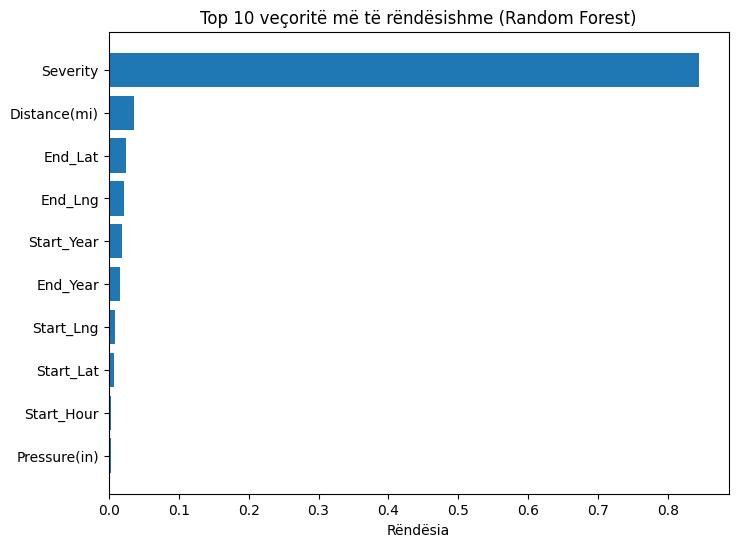

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import numpy as np


X_num = df_merged.select_dtypes(include=['float64', 'int64', 'Int64'])
y = df_merged['Severity']  # te ndryshohet

# Zgjedhje me Random Forest Importance 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_num, y)
importances = rf.feature_importances_

indices = np.argsort(importances)[-10:]
plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), X_num.columns[indices])
plt.xlabel('Rendesia')
plt.title('Top 10 veçorite me te rendesishme (Random Forest)')
plt.show()


In [327]:
from sklearn.preprocessing import KBinsDiscretizer

df_disc = df_merged.copy()

numeric_cols = df_disc.select_dtypes(include=['float64', 'int64', 'Int64']).columns

exclude_cols = ['ID', 'Severity']  # ID dhe target nuk duhen ndare ne intervale
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]


discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

for col in numeric_cols:
    if df_disc[col].nunique() > 4:
        try:
            df_disc[col + '_Binned'] = discretizer.fit_transform(df_disc[[col]])
            print(f" Kolona '{col}' u diskretizua me sukses ne 4 intervale.")
        except Exception as e:
            print(f"Kolona '{col}' nuk u diskretizua ({e}).")

binned_cols = [col for col in df_disc.columns if col.endswith('_Binned')]
print(f"\nTotali i kolonave te reja te krijuara: {len(binned_cols)}")
print("Shembuj te kolonave te diskretizuara:", binned_cols[:10])

df_disc.head(5)


 Kolona 'Start_Year' u diskretizua me sukses ne 4 intervale.
 Kolona 'Start_Hour' u diskretizua me sukses ne 4 intervale.
 Kolona 'End_Year' u diskretizua me sukses ne 4 intervale.
 Kolona 'End_Hour' u diskretizua me sukses ne 4 intervale.
 Kolona 'Start_Lat' u diskretizua me sukses ne 4 intervale.
 Kolona 'Start_Lng' u diskretizua me sukses ne 4 intervale.
 Kolona 'End_Lat' u diskretizua me sukses ne 4 intervale.
 Kolona 'End_Lng' u diskretizua me sukses ne 4 intervale.
 Kolona 'Distance(mi)' u diskretizua me sukses ne 4 intervale.
 Kolona 'Temperature(F)' u diskretizua me sukses ne 4 intervale.
 Kolona 'Wind_Chill(F)' u diskretizua me sukses ne 4 intervale.
 Kolona 'Humidity(%)' u diskretizua me sukses ne 4 intervale.
 Kolona 'Pressure(in)' u diskretizua me sukses ne 4 intervale.
 Kolona 'Visibility(mi)' u diskretizua me sukses ne 4 intervale.
 Kolona 'Wind_Speed(mph)' u diskretizua me sukses ne 4 intervale.
 Kolona 'Precipitation(in)' u diskretizua me sukses ne 4 intervale.

Totali 

c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
c:\Users\perve\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\preprocessing\_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,ID,Source,Severity,Start_Time,Start_Day,Start_Month,Start_Year,Start_Hour,End_Time,End_Day,...,End_Lat_Binned,End_Lng_Binned,Distance(mi)_Binned,Temperature(F)_Binned,Wind_Chill(F)_Binned,Humidity(%)_Binned,Pressure(in)_Binned,Visibility(mi)_Binned,Wind_Speed(mph)_Binned,Precipitation(in)_Binned
0,A-7182628,Source1,1,2020-04-17 09:29:30,Friday,April,2020,9,2020-04-17 10:29:30,Friday,...,0.0,3.0,0.0,3.0,3.0,2.0,3.0,1.0,3.0,0.0
1,A-5404588,Source1,2,2020-06-23 21:58:56,Friday,December,2020,13,2020-06-24 06:22:49,Friday,...,3.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,0.0
2,A-156000,Source3,3,2016-08-12 16:45:00,Friday,August,2016,16,2016-08-12 17:15:00,Friday,...,2.0,2.0,0.0,3.0,2.0,0.0,2.0,1.0,3.0,0.0
3,A-1871277,Source2,3,2019-09-20 15:22:16,Friday,September,2019,15,2019-09-20 15:56:00,Friday,...,2.0,2.0,0.0,2.0,2.0,3.0,1.0,1.0,0.0,0.0
4,A-2031222,Source2,2,2019-06-03 16:55:43,Monday,June,2019,16,2019-06-03 18:12:09,Monday,...,2.0,2.0,0.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0


In [328]:
df_disc.head(3).filter(like='_Binned')


,Start_Year_Binned,Start_Hour_Binned,End_Year_Binned,End_Hour_Binned,Start_Lat_Binned,Start_Lng_Binned,End_Lat_Binned,End_Lng_Binned,Distance(mi)_Binned,Temperature(F)_Binned,Wind_Chill(F)_Binned,Humidity(%)_Binned,Pressure(in)_Binned,Visibility(mi)_Binned,Wind_Speed(mph)_Binned,Precipitation(in)_Binned
0,2.0,1.0,2.0,1.0,0.0,3.0,0.0,3.0,0.0,3.0,3.0,2.0,3.0,1.0,3.0,0.0
1,2.0,2.0,2.0,2.0,2.0,0.0,3.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,0.0
2,0.0,3.0,0.0,3.0,1.0,2.0,2.0,2.0,0.0,3.0,2.0,0.0,2.0,1.0,3.0,0.0
